In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv('/content/FlightPrice_train.csv')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Bengaluru,New Delhi,BLR ? DEL,22:20,22-03-2020 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Bengaluru,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2020 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Bengaluru,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Bengaluru,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,09-04-2019,Kolkata,Bengaluru,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Bengaluru,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Bengaluru,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Bengaluru,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,09-05-2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.shape

(10683, 11)

In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# ***EXPLORING DATA***

In [9]:
numeric_data=[feature for feature in data.columns if data[feature].dtype != 'O']
categorical_data=[feature for feature in data.columns if data[feature].dtype == 'O']

In [10]:
print(f'We have {len(numeric_data)} numerical features :{numeric_data}')
print(f'We have {len(categorical_data)} categorical features :{categorical_data}') 

We have 1 numerical features :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [11]:
for col in categorical_data:
    print(data[col].value_counts(normalize=True)*100)
    print('============')

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64
18-05-2019    4.717776
06-06-2019    4.708415
21-05-2019    4.652251
09-06-2019    4.633530
12-06-2019    4.614809
09-05-2019    4.530563
21-03-2019    3.959562
15-05-2019    3.791070
06-03-2019    3.772349
27-05-2019    3.575775
27-06-2019    3.323037
24-06-2019    3.285594
01-06-2019    3.201348
03-06-2019    3.117102
15-06-2019    3.070299
24-03-2019    3.023495
03-03-2019    2.948610
09-03-2019    2

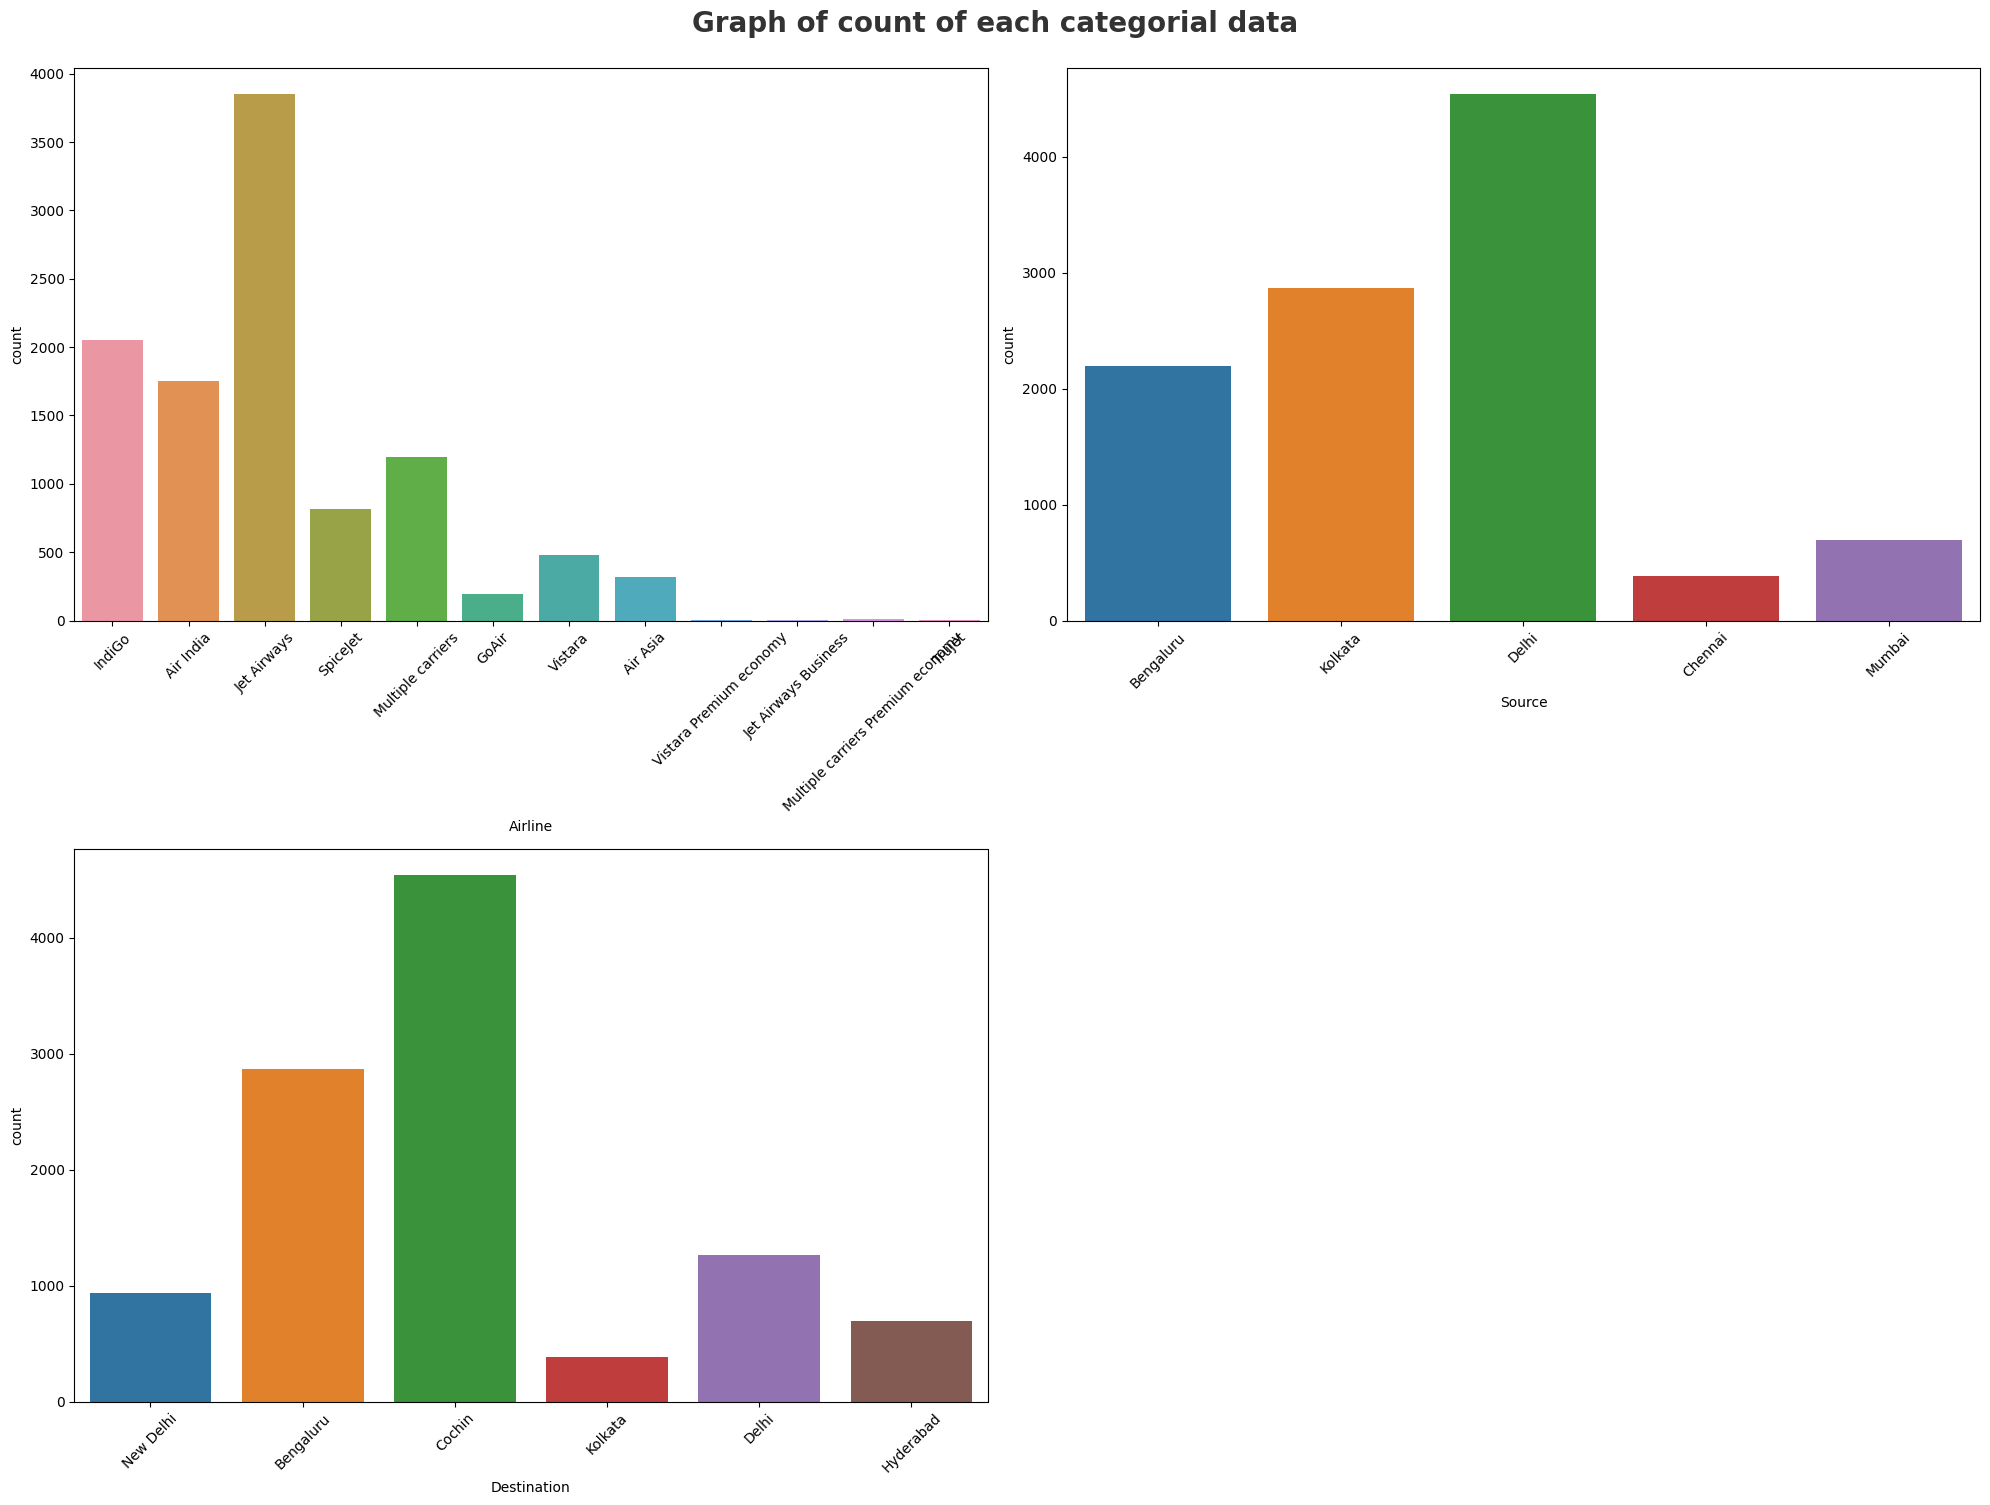

In [12]:
plt.figure(figsize=(20,15))
plt.suptitle('Graph of count of each categorial data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Airline','Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

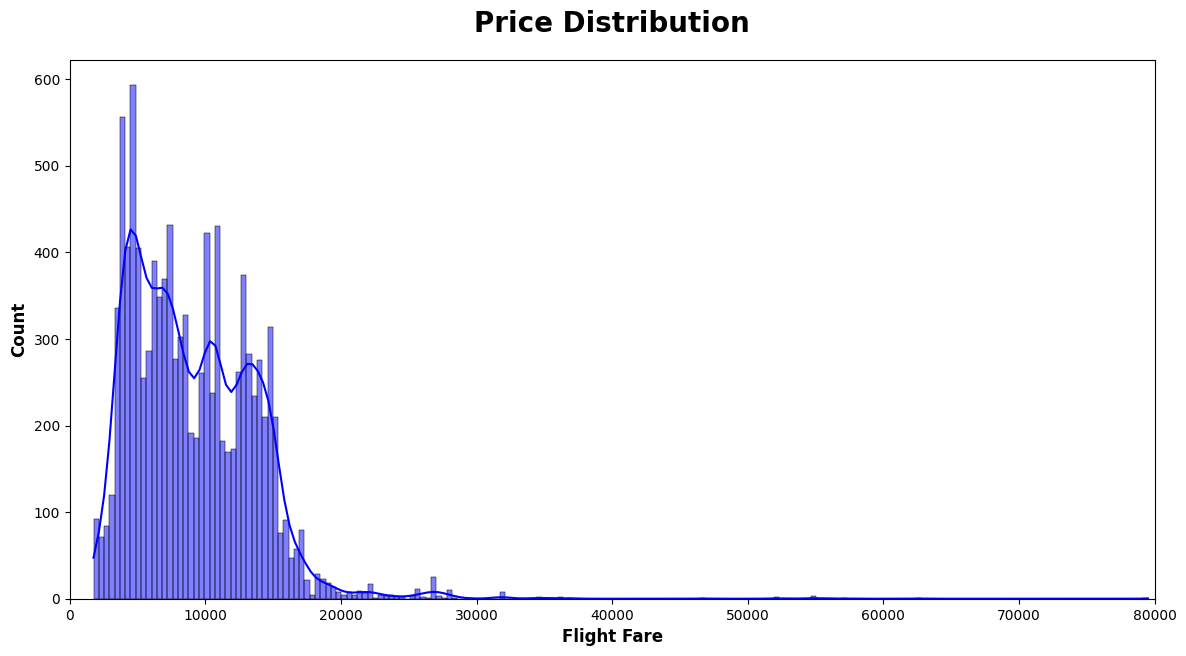

In [13]:
plt.subplots(figsize=(14,7))
sns.histplot(data.Price, bins=200, kde=True, color = 'b')
plt.title("Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

In [14]:
#Top 10 Aviation Companies whose flight tickets are sold the most
data.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

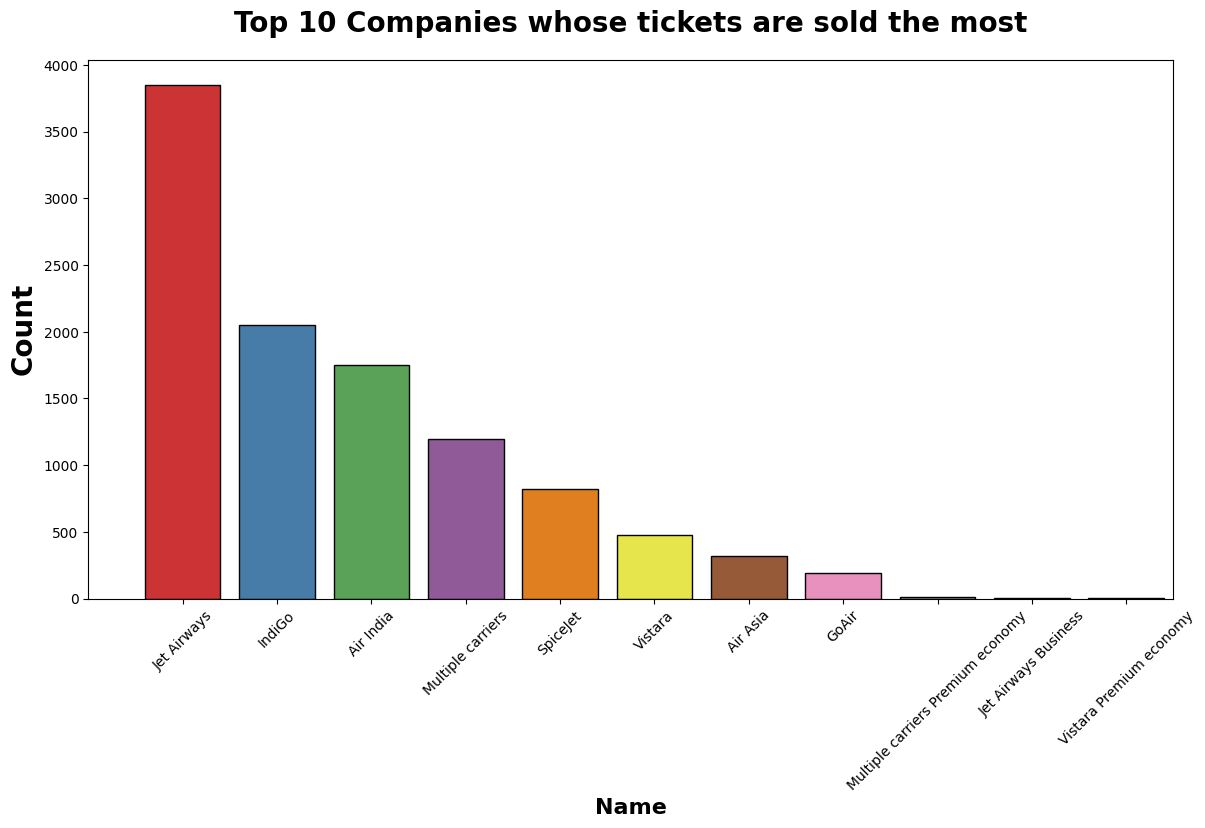

In [15]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=data,ec = "black",palette="Set1",order = data['Airline'].value_counts().index)
plt.title("Top 10 Companies whose tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

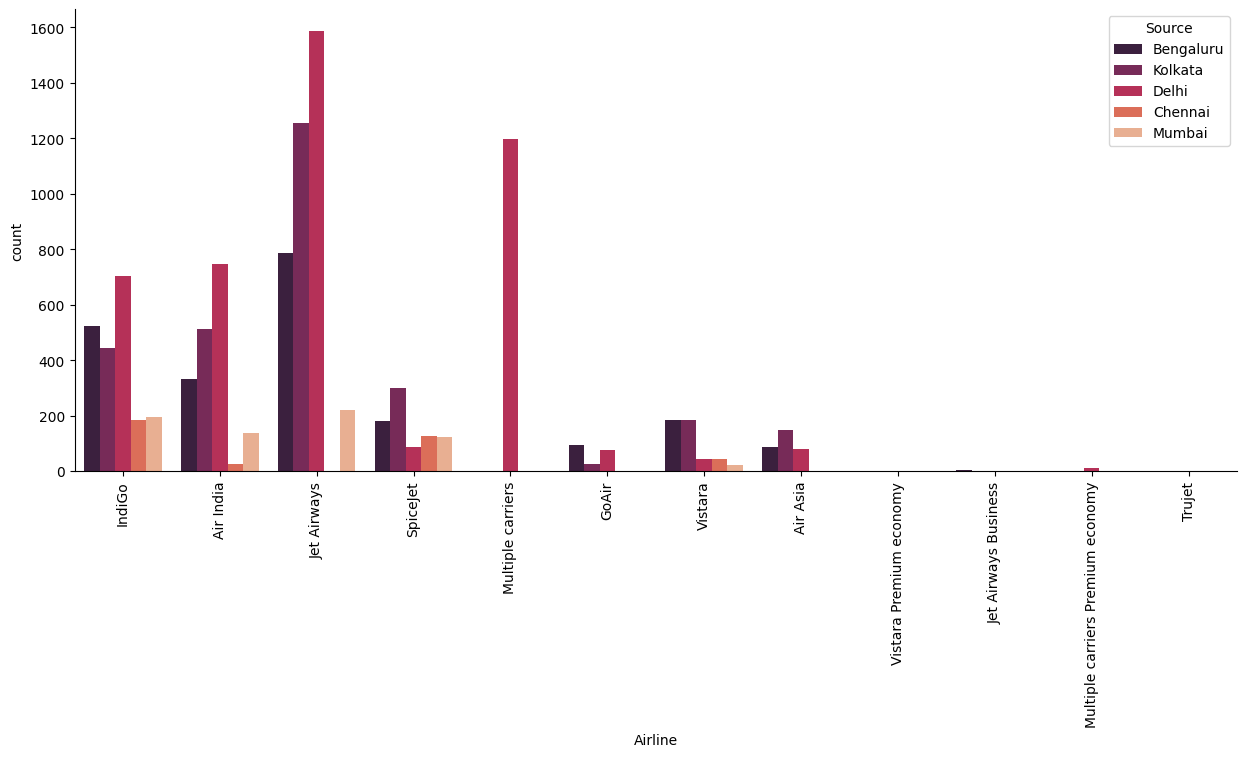

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(data, x ='Airline' ,hue= 'Source', palette ='rocket')
plt.xticks(rotation = 90)
sns.despine()
plt.show()

In [17]:
#Mean price of Jet Airways whose flight tickets are sold the most
jet_airways = data[data['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways Flight Tickets  is {jet_airways:.2f} Rupees')

The mean price of Jet Airways Flight Tickets  is 11643.92 Rupees


In [18]:
#Costliest Aviation Companies and Costliest Flight Tickets
airline = data.groupby('Airline').Price.max()
company= airline.to_frame().sort_values('Price',ascending=False)[0:10]
company

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


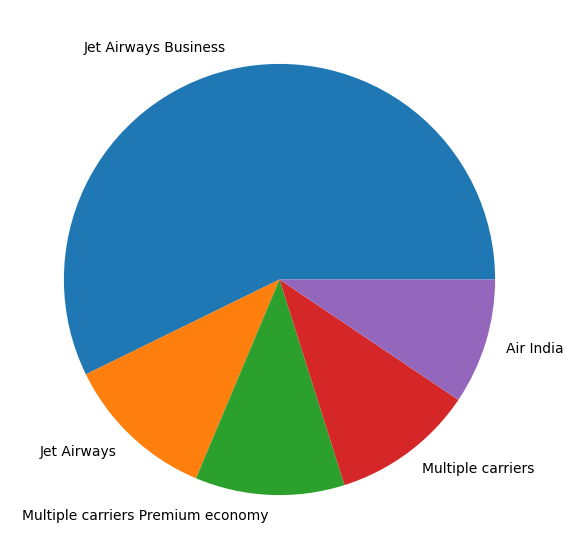

In [19]:
airline_company = data.groupby('Airline')
company = airline_company.mean().sort_values('Price', ascending=False)[0:5]
fig = plt.figure(figsize=(10, 7))
plt.pie(company['Price'], labels=company.index)
plt.show()

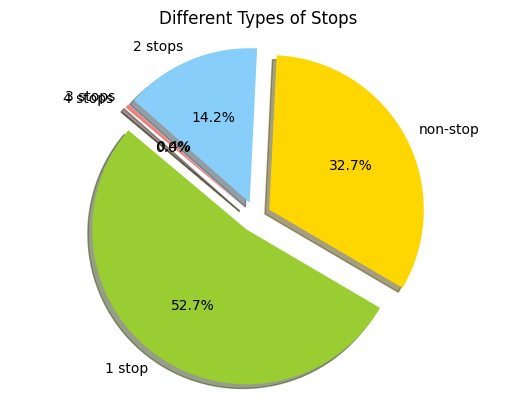

In [20]:
stop_counts = data['Total_Stops'].value_counts()
labels = stop_counts.index.tolist()
sizes = stop_counts.tolist()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1,0.1,0.1,0.1)
plt.pie(sizes,explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Different Types of Stops")
plt.show()

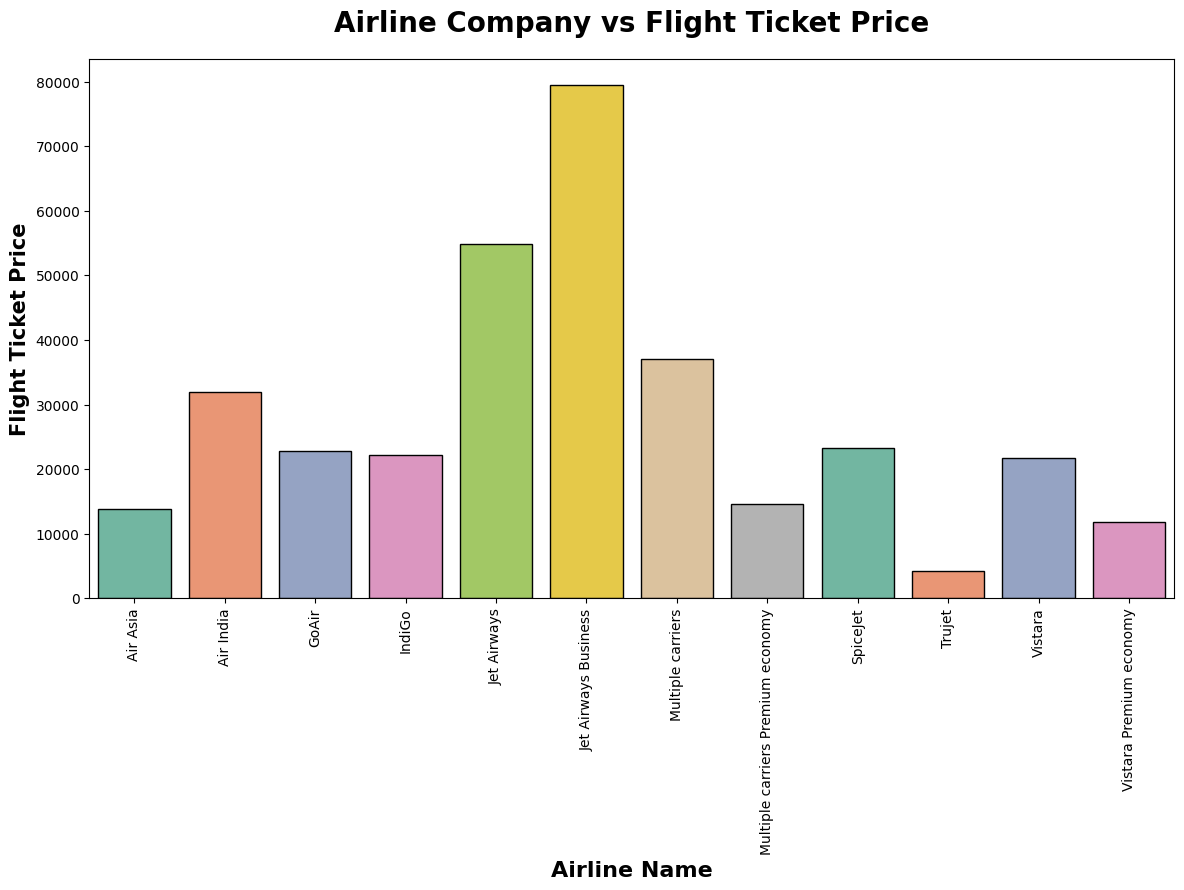

In [21]:
plt.subplots(figsize=(14,7))
sns.barplot(x=airline.index, y=airline.values,ec = "black",palette="Set2")
plt.title("Airline Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

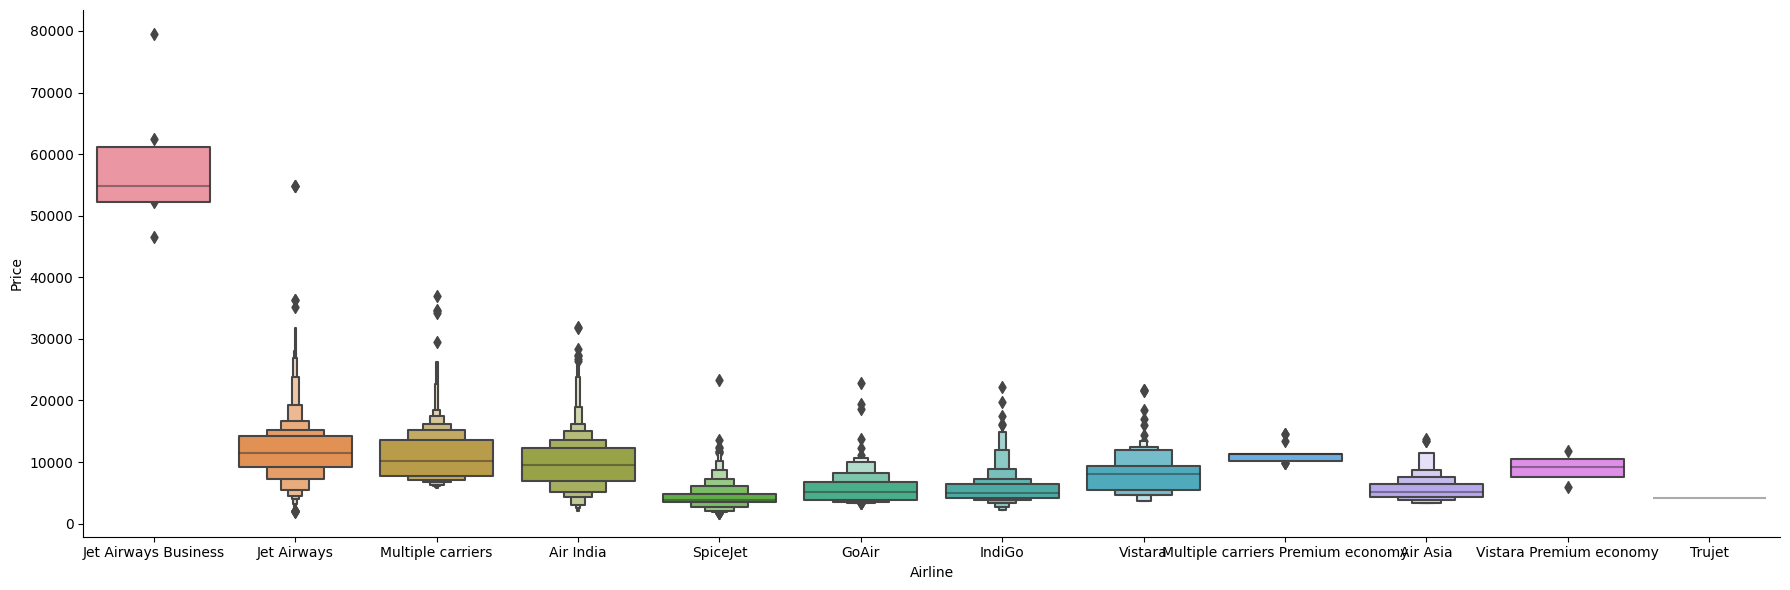

In [22]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

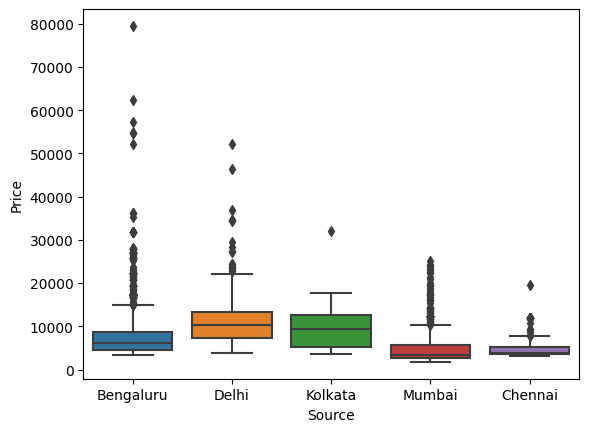

In [23]:
sns.boxplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False))
plt.show()

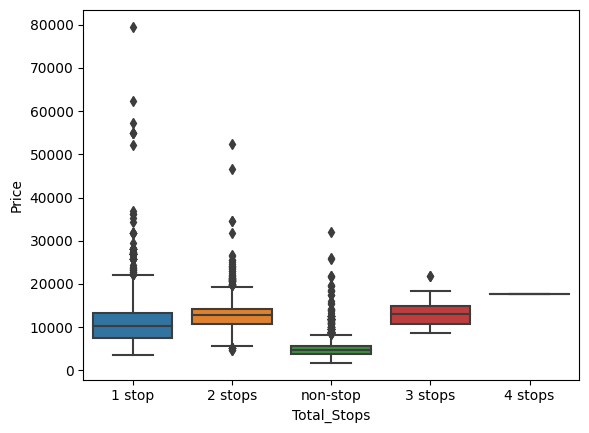

In [24]:
sns.boxplot(y = "Price", x = "Total_Stops", data = data.sort_values("Price", ascending = False))
plt.show()

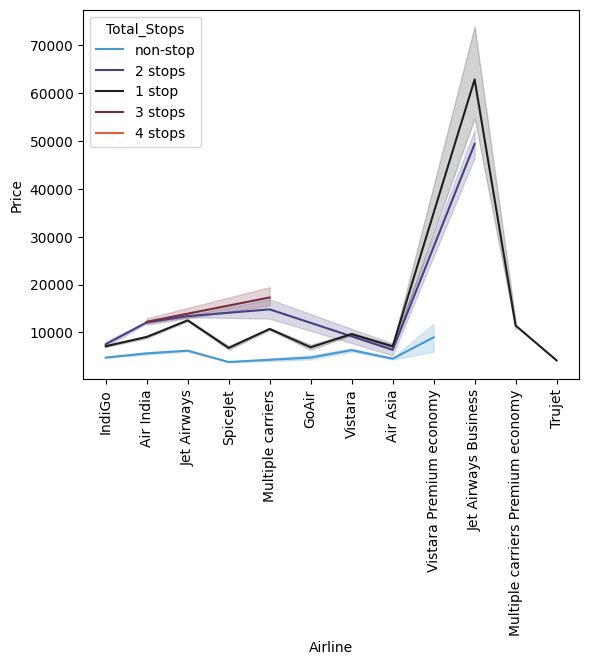

In [25]:
sns.lineplot(data, x =  'Airline', y = 'Price',hue = 'Total_Stops', palette='icefire' )
plt.xticks(rotation = 90)
plt.show()

1-Stop Fights with Jet Airways Business are the costliest followed by the 2-Stop flights with the same
Non stop flights are the cheapest across the board

In [26]:
#OneHotEncoding -----> Nominal data
Source = data[["Source"]]
Source = pd.get_dummies(data['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
# droping column, because Additinal_info has since 80 % has no information 
# Route---> is related to no of stops
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [29]:
data['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
#we replace the values in key values 
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24-03-2019,Bengaluru,New Delhi,22:20,22-03-2020 01:10,2h 50m,0,3897
1,Air India,01-05-2019,Kolkata,Bengaluru,05:50,13:15,7h 25m,2,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,09:25,10-06-2020 04:25,19h,2,13882
3,IndiGo,12-05-2019,Kolkata,Bengaluru,18:05,23:30,5h 25m,1,6218
4,IndiGo,01-03-2019,Bengaluru,New Delhi,16:50,21:35,4h 45m,1,13302


<Axes: >

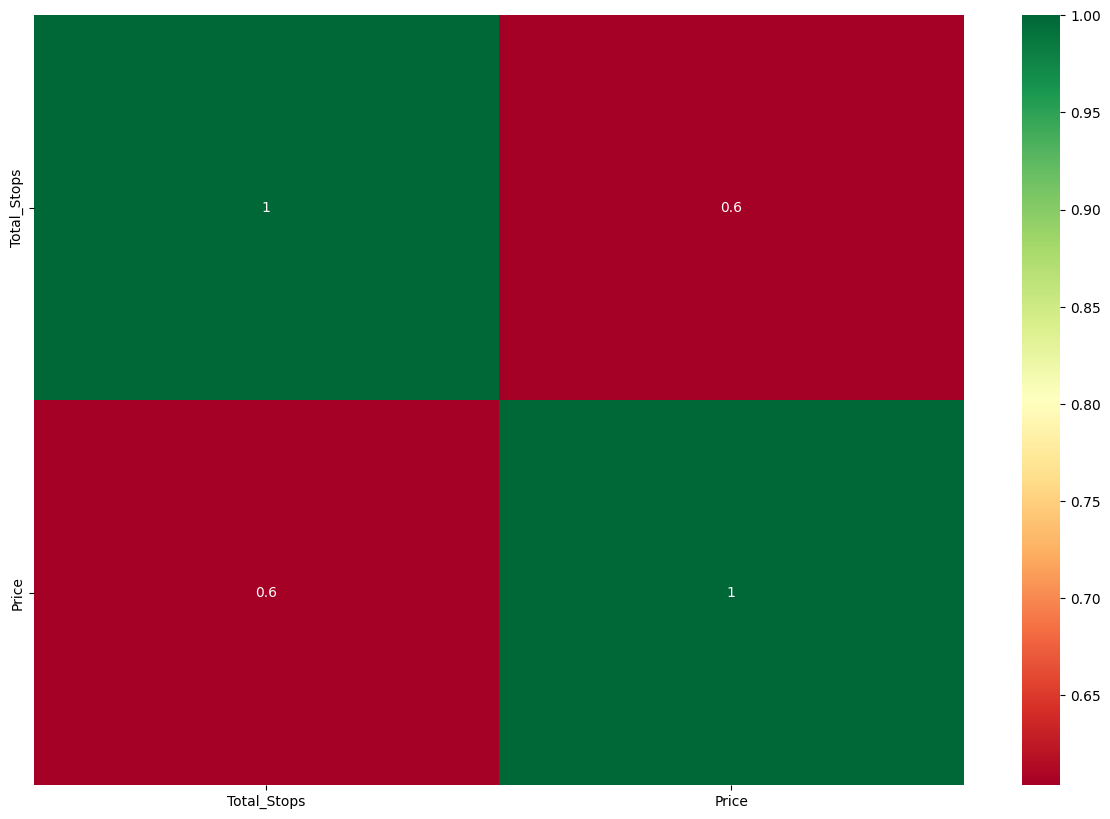

In [30]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True, cmap = "RdYlGn")  

In [31]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])
data["day"] = data["Date_of_Journey"].dt.day_name()

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24-03-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24-06-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27-05-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18-04-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [32]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day
0,IndiGo,2019-03-24,Bengaluru,New Delhi,22:20,22-03-2020 01:10,2h 50m,0,3897,Sunday
1,Air India,2019-01-05,Kolkata,Bengaluru,05:50,13:15,7h 25m,2,7662,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,10-06-2020 04:25,19h,2,13882,Friday
3,IndiGo,2019-12-05,Kolkata,Bengaluru,18:05,23:30,5h 25m,1,6218,Thursday
4,IndiGo,2019-01-03,Bengaluru,New Delhi,16:50,21:35,4h 45m,1,13302,Thursday


In [33]:
data.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},inplace=True)

In [34]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day
0,IndiGo,2019-03-24,Bengaluru,New Delhi,22:20,22-03-2020 01:10,2h 50m,0,3897,7
1,Air India,2019-01-05,Kolkata,Bengaluru,05:50,13:15,7h 25m,2,7662,6
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,10-06-2020 04:25,19h,2,13882,5
3,IndiGo,2019-12-05,Kolkata,Bengaluru,18:05,23:30,5h 25m,1,6218,4
4,IndiGo,2019-01-03,Bengaluru,New Delhi,16:50,21:35,4h 45m,1,13302,4


In [35]:
data.tail(50)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day
10633,Multiple carriers,2019-05-27,Delhi,Cochin,18:15,28-05-2020 01:30,7h 15m,1,7308,1
10634,Jet Airways,2019-06-06,Delhi,Cochin,09:40,07-06-2020 12:35,26h 55m,2,11733,4
10635,Jet Airways,2019-01-06,Delhi,Cochin,22:50,02-06-2020 12:35,13h 45m,1,14714,7
10636,Jet Airways,2019-05-15,Kolkata,Bengaluru,06:30,12:00,5h 30m,1,14388,3
10637,Jet Airways,2019-04-24,Bengaluru,Delhi,18:55,22:00,3h 5m,0,7229,3
10638,Jet Airways,2019-03-21,Bengaluru,New Delhi,21:25,19-03-2020 11:25,14h,1,7832,4
10639,Air India,2019-03-06,Delhi,Cochin,05:15,04-06-2020 19:15,38h,3,10493,3
10640,Jet Airways,2019-09-03,Delhi,Cochin,18:15,10-03-2020 18:50,24h 35m,1,14053,2
10641,IndiGo,2019-06-03,Chennai,Kolkata,07:55,10:15,2h 20m,0,7295,1
10642,Air India,2019-05-21,Kolkata,Bengaluru,08:20,22-05-2020 11:10,26h 50m,2,11222,2


#***Develop and test the hypothesis:***
## 1.   Flight Prices on Weekdays are cheaper than flight prices on weekends. 
### Null Hypothesis: There is no significant difference between the flight prices on weekdays and flight prices on weekends
### Alternate hypothesis: There is significant difference between the flight prices on weekdays and flight prices on weekends

In [36]:
from scipy.stats import chi2_contingency
weekday_prices = data[data["day"] <= 5]["Price"]
weekend_prices = data[data["day"] > 5]["Price"]
observed = pd.DataFrame({
    "Weekday": [len(weekday_prices), weekday_prices.mean()],
    "Weekend": [len(weekend_prices), weekend_prices.mean()]}, index=["Count", "Mean"])

observed

,Weekday,Weekend
Count,8418.000000,2265.00000
Mean,9055.336303,9204.98234


In [43]:
#n = observed["Count"].sum()
n=10683
weekday_prop = observed.loc["Count", "Weekday"] / n
expected = pd.DataFrame({
    "Weekday": [n * weekday_prop, weekday_prices.mean()],
    "Weekend": [n * (1 - weekday_prop), weekend_prices.mean()]
}, index=["Count", "Mean"])

chi2, p, dof, expected = chi2_contingency(observed, correction=False)
print(f"Chi-square statistic: {chi2:.4f}")
print("p-value:", p_value)

Chi-square statistic: 2403.3136
p-value: 2.444279106755177e-07


## SInce the p-value of the given condition is less than 0.05 which implies that we can reject the null hypothesis and go with the alternate hypothesis which again tells us that there is a significant difference between the flight prices on weekdays and flight prices on weekends

#***Develop and test the hypothesis:***
## 1.   Flight Prices during peak hours (9 AM till 9 PM ) are costlier than flights at other times.

### Null Hypothesis: There is no significant difference between the flight prices during peak hours (9 AM till 9 PM) and flight prices at other times.

### Alternate hypothesis: There is significant difference between the flight prices during peak hours (9 AM till 9 PM) and flight prices at other times.

In [39]:
from scipy.stats import ttest_ind

In [40]:
data['Dep_Time'] = data['Dep_Time'].str.replace(':', '')

In [41]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day
0,IndiGo,2019-03-24,Bengaluru,New Delhi,2220,22-03-2020 01:10,2h 50m,0,3897,7
1,Air India,2019-01-05,Kolkata,Bengaluru,0550,13:15,7h 25m,2,7662,6
2,Jet Airways,2019-09-06,Delhi,Cochin,0925,10-06-2020 04:25,19h,2,13882,5
3,IndiGo,2019-12-05,Kolkata,Bengaluru,1805,23:30,5h 25m,1,6218,4
4,IndiGo,2019-01-03,Bengaluru,New Delhi,1650,21:35,4h 45m,1,13302,4


In [44]:
peak_hours = data[(data['Dep_Time'] >= '0900') & (data['Dep_Time'] <= '2100')]
other_times = data[(data['Dep_Time'] < '0900') | (data['Dep_Time'] > '2100')]
t_stat, p_value = ttest_ind(peak_hours['Price'], other_times['Price'], equal_var=False)
alpha = 0.05  
print("p-value:", p_value)
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

p-value: 2.444279106755177e-07
Reject null hypothesis


###SInce the p-value of the given condition is zero which implies that we can reject the null hypothesis and go with the alternate hypothesis which again tells us that there is significant difference between the flight prices during peak hours (9 AM till 9 PM) and flight prices at other times.

### Resolving journey month and date

In [45]:
data['Dep_Time'] = data['Dep_Time'].str[:2] + ':' + data['Dep_Time'].str[2:]

In [46]:
data['Journey_day']= pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day
data['Journey_month']=pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [47]:
data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [48]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,Journey_day,Journey_month
0,IndiGo,Bengaluru,New Delhi,22:20,22-03-2020 01:10,2h 50m,0,3897,7,24,3
1,Air India,Kolkata,Bengaluru,05:50,13:15,7h 25m,2,7662,6,5,1
2,Jet Airways,Delhi,Cochin,09:25,10-06-2020 04:25,19h,2,13882,5,6,9
3,IndiGo,Kolkata,Bengaluru,18:05,23:30,5h 25m,1,6218,4,5,12
4,IndiGo,Bengaluru,New Delhi,16:50,21:35,4h 45m,1,13302,4,3,1


In [49]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [50]:
data.drop(['Dep_Time'], axis=1, inplace=True)

In [51]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [52]:
data.drop(['Arrival_Time'], axis=1, inplace=True)

In [53]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [54]:
data['Duration_hours']=duration_hours
data['Duration_mins']=duration_mins

In [55]:
data.drop(['Duration'], axis=1, inplace=True)

In [56]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [57]:
Airline=data[['Airline']]
Airline=pd.get_dummies(Airline,  drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [58]:
data['Source'].value_counts()

Delhi        4537
Kolkata      2871
Bengaluru    2197
Mumbai        697
Chennai       381
Name: Source, dtype: int64

In [59]:
Source=data[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [60]:
data['Destination'].value_counts()

Cochin       4537
Bengaluru    2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [61]:
Destination=data[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [62]:
data

,Airline,Source,Destination,Total_Stops,Price,day,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Bengaluru,New Delhi,0,3897,7,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Bengaluru,2,7662,6,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,5,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Bengaluru,1,6218,4,5,12,18,5,23,30,5,25
4,IndiGo,Bengaluru,New Delhi,1,13302,4,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Bengaluru,0,4107,3,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Bengaluru,0,4145,6,27,4,20,45,23,20,2,35
10680,Jet Airways,Bengaluru,Delhi,0,7229,6,27,4,8,20,11,20,3,0
10681,Vistara,Bengaluru,New Delhi,0,12648,4,3,1,11,30,14,10,2,40


In [63]:
data_train=pd.concat([data, Airline, Source, Destination], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,day,Journey_day,Journey_month,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Bengaluru,New Delhi,0,3897,7,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Bengaluru,2,7662,6,5,1,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,5,6,9,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Bengaluru,1,6218,4,5,12,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Bengaluru,New Delhi,1,13302,4,3,1,16,50,...,0,0,0,0,0,0,0,0,0,1


In [64]:
data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [65]:
data_train

,Total_Stops,Price,day,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,7,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,6,5,1,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,5,6,9,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,4,5,12,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,3,1,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,3,4,9,19,55,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,6,27,4,20,45,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,6,27,4,8,20,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,4,3,1,11,30,14,10,2,...,0,0,0,0,0,0,0,0,0,1


In [66]:
data_train.shape

(10683, 31)

## Feature selection

In [67]:
x=data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
y=data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Model Creation and testing

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

##**Multiple linear regression**


In [70]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
regressor.score(x_train, y_train)
print("Accuracy in MLP: ",regressor.score(x_test, y_test)*100)

Accuracy in MLP:  56.680690784392866


##**Decision Tree**

In [71]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
regressor.score(x_train, y_train)
print("Accuracy in Decision Tree: ",regressor.score(x_test, y_test)*100)

Accuracy in Decision Tree:  67.69521133604076


##**Random Forest Regressor**

In [72]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor(n_estimators=100, random_state=0)
regressor_rf.fit(x_train, y_train)
y_pred=regressor_rf.predict(x_test)
regressor_rf.score(x_train, y_train)
print("Accuracy in Random Forest Regressor: ",regressor_rf.score(x_test, y_test)*100)

Accuracy in Random Forest Regressor:  80.0546248133483


#***From the above we can see that we are getting the highest accuracy for random forest for dataset.***

In [73]:
from sklearn import metrics

In [74]:
print("MAE value: ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE value: ",metrics.mean_squared_error(y_test, y_pred))
print("R2 value: ",metrics.r2_score(y_test, y_pred))

MAE value:  1197.5462298245222
MSE value:  4223187.156698035
R2 value:  0.800546248133483


In [75]:
import pickle
file = open('flight_model.pkl', 'wb')
pickle.dump(regressor_rf, file)
model=open('flight_model.pkl', 'rb')
flight_price=pickle.load(model)

# ***Predictiong the price of flight of flight_test dataset***

In [76]:
testing_data=pd.read_excel("/content/FlightPrice_test.xlsx")

In [77]:
testing_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [78]:
testing_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [79]:
testing_data["Date_of_Journey"] = pd.to_datetime(testing_data["Date_of_Journey"])
testing_data["day"] =testing_data["Date_of_Journey"].dt.day_name()
testing_data.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7},inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [80]:
# Date_of_Journey
testing_data["Journey_day"] = pd.to_datetime(testing_data.Date_of_Journey, format="%d/%m/%Y").dt.day
testing_data["Journey_month"] = pd.to_datetime(testing_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
testing_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
testing_data["Dep_hour"] = pd.to_datetime(testing_data["Dep_Time"]).dt.hour
testing_data["Dep_min"] = pd.to_datetime(testing_data["Dep_Time"]).dt.minute
testing_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
testing_data["Arrival_hour"] = pd.to_datetime(testing_data.Arrival_Time).dt.hour
testing_data["Arrival_min"] = pd.to_datetime(testing_data.Arrival_Time).dt.minute
testing_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(testing_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
testing_data["Duration_hours"] = duration_hours
testing_data["Duration_mins"] = duration_mins
testing_data.drop(["Duration"], axis = 1, inplace = True)

In [81]:
testing_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,4,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,4,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,1,24,6,23,55,2,45,2,50


In [82]:
testing_data['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [83]:
Airline=testing_data[['Airline']]
Airline=pd.get_dummies(Airline,  drop_first=True)

In [84]:
Source=testing_data[['Source']]
Source=pd.get_dummies(Source, drop_first=True)

In [85]:
Destination=testing_data[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)

In [86]:
testing_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
testing_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test_data = pd.concat([testing_data, Airline, Source, Destination], axis = 1)
test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [87]:
test_data.head()

,Total_Stops,day,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,4,6,6,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,4,5,12,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2,21,5,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,2,21,5,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,24,6,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [88]:
test_data.columns

Index(['Total_Stops', 'day', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [89]:
test_data['Airline_Trujet'] =0

In [90]:
test_data = test_data.drop('day', axis=1)

In [91]:
import warnings
# Ignore specific warning
warnings.filterwarnings("ignore", message="Your warning message here")

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code here

# Reset warning filters
warnings.resetwarnings()

In [92]:
import joblib

# Load the previously trained model
model = joblib.load('/content/flight_model.pkl')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
test_data = test_data[x.columns]

In [94]:
predicted_prices = model.predict(test_data)

In [95]:
np.savetxt('predicted_flight_prices.csv', predicted_prices, delimiter=',')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
